In this file we are going to load the resulting report from i-Tree Eco and the statistical areas of Bologna and clean them to be able to use them in the web app.

Mainly we are going to:
1. Load the benefit sum data
- Clean the data
    - Rename columns
    - Convert columns to the correct type
    - Create the sum of all the records and append it to the end of the dataframe
- Save the data in a geojson file

2. Load the statistical areas of Bologna
- Define the structure of the data
- Save the data in a geojson file

RECORDS THAT CANNOT BE IMPORTED: 1145 over 86088 (no species match)

In [1]:
import fiona
import geopandas as gpd
import pandas as pd
import matplotlib as plt

In [2]:
statistical_areas_url ="https://opendata.comune.bologna.it/api/explore/v2.1/catalog/datasets/aree-statistiche/exports/shp?lang=it&timezone=Europe%2FRome"

In [3]:
benefit_and_costs = pd.read_excel('../data/reports/BenefitsAndCosts.xlsx')

data_trees_1 = pd.read_csv('../data/reports/IndividualLevelResultsSummary.csv', sep=';')
final_input = pd.read_csv('../data/reports/export_eco.csv', sep=';')

WARNING *** file size (137857) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


/var/folders/j8/fjrnp8w15sbf5q2fdgnpb0br0000gn/T/ipykernel_6809/2356451606.py:4: DtypeWarning: Columns (24,25,26,28) have mixed types. Specify dtype option on import or set low_memory=False.
  final_input = pd.read_csv('../data/reports/export_eco.csv', sep=';')


In [5]:
data_trees = pd.read_csv('../data/temp/benefit_sum_by_tree.csv', sep=";")

#full_trees_dataset = pd.read_excel('../data/old/output_file_cleaned.xlsx')
data_trees_composition = pd.read_csv('../data/temp/input_itree.csv', sep=";")
data_trees_oxygen = pd.read_excel('../data/temp/carbon_storage_by_species.xlsx', header=1)

In [2]:
# OLD CODE
data_trees = pd.read_excel('full report per tree.xlsx')
full_trees_dataset = pd.read_excel('../modifiedDataset.xlsx')
data_trees_composition = pd.read_excel('composition recap.xlsx')
data_trees_oxygen = pd.read_excel('oxygen recap.xlsx')

data_trees_composition.columns


Index(['Unnamed: 0', 'Tree ID', 'Species Name', 'DBH', 'Height',
       'Crown Height', 'Crown Width', 'Canopy Cover', 'Tree Condition',
       'Leaf Area', 'Leaf Biomass', 'Leaf Area Index', 'Basal Area',
       'Unnamed: 13', 'Native to State'],
      dtype='object')

In [3]:
data_trees_oxygen.drop('Unnamed: 0', axis = 1,inplace=True)
data_trees_oxygen.drop(index=0,inplace=True)

data_trees_composition.drop('Unnamed: 0', axis = 1,inplace=True)
data_trees_composition.drop(index=0,inplace=True)

In [10]:
data_trees_1.columns

Index(['Tree ID', 'Species Name', 'DBH (in)', 'Replacement Value (€)',
       'Carbon Storage (lb)', 'Carbon Storage (€)',
       'Gross Carbon Sequestration (lb/yr)',
       'Gross Carbon Sequestration (€/yr)', 'Avoided Runoff (gal/yr)',
       'Avoided Runoff (€/yr)', 'Carbon Avoided (lb/yr)',
       'Carbon Avoided (€/yr)', 'Pollution Removal (oz/yr)',
       'Pollution Removal (€/yr)', 'Energy Savings (€/yr)',
       'Total Annual Benefits (€/yr)'],
      dtype='object')

In [3]:
# rename columns (we do that in order to have the same names as the other datasets)
data_trees.rename(columns={'Species Name':'Name'}, inplace=True)
data_trees.rename(columns={'Replacement Value (€)':'Replacement Value (eur)'}, inplace=True)
data_trees.rename(columns={'Carbon Storage (€)':'Carbon Storage (eur)'}, inplace=True)
data_trees.rename(columns={'Gross Carbon Sequestration (€/yr)':'Gross Carbon Sequestration (eur/yr)'}, inplace=True)
data_trees.rename(columns={'Avoided Runoff (€/yr)':'Avoided Runoff (eur/yr)'}, inplace=True)
data_trees.rename(columns={'Carbon Avoided (€/yr)':'Carbon Avoided (eur/yr)'}, inplace=True)
data_trees.rename(columns={'Pollution Removal (€/yr)':'Pollution Removal (eur/yr)'}, inplace=True)
data_trees.rename(columns={'Energy Savings (€/yr)':'Energy Savings (eur/yr)'}, inplace=True)
data_trees.rename(columns={'Total Annual Benefits (€/yr)':'Total Annual Benefits (eur/yr)'}, inplace=True)

# Create the geojson files

<AxesSubplot:>

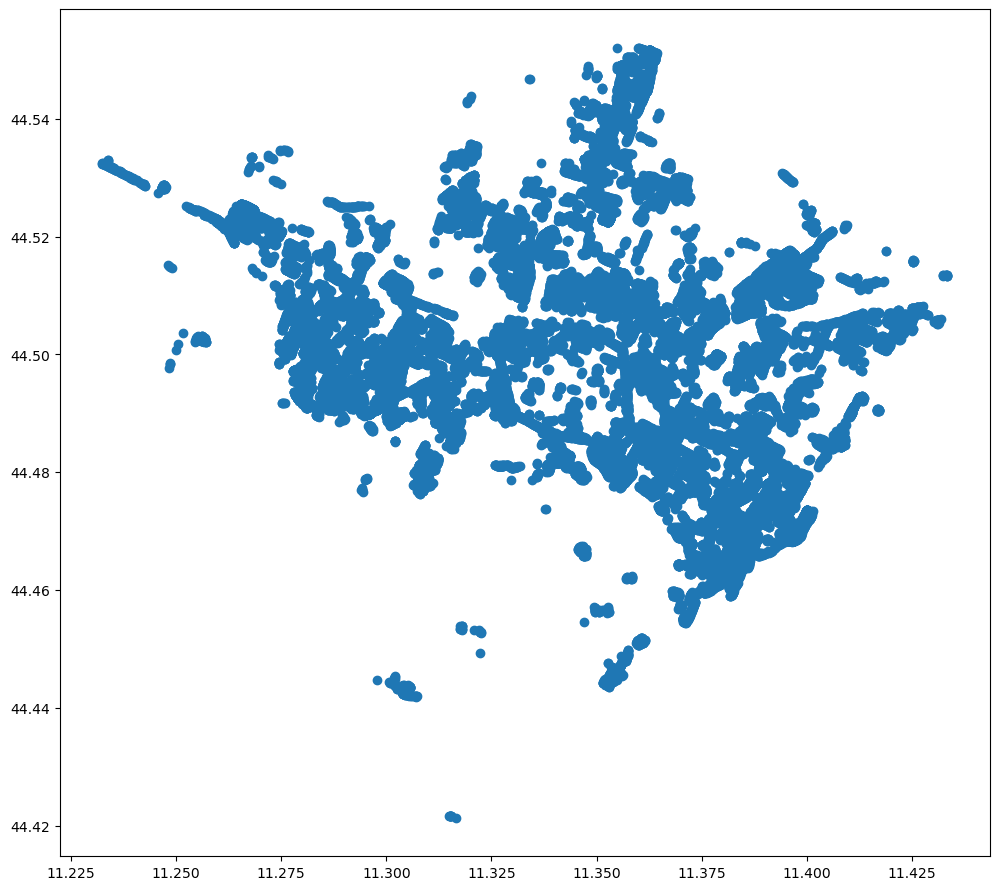

In [4]:
#data_trees['Oxygen Production (kg/yr)'] = data_trees_oxygen['Oxygen Production']
data_trees['Height (m)'] = data_trees_composition['Total Height (m)']

# TODO: fix this, pick the data from the original dataset
data_trees['Oxygen Production (kg/yr)'] = "2.8"
data_trees['Crown Height (m)'] = "1"
data_trees['Crown Width (m)'] = "1.5"
data_trees['Canopy Cover (m2)'] = "1.8"
data_trees['Leaf Area (m2)'] = "3.5"
data_trees['Leaf Biomass (kg)'] = "0.2"
# data_trees['Crown Height (m)'] = data_trees_composition['Crown Height']
# data_trees['Crown Width (m)'] = data_trees_composition['Crown Width']
# data_trees['Canopy Cover (m2)'] = data_trees_composition['Canopy Cover']
# data_trees['Leaf Area (m2)'] = data_trees_composition['Leaf Area']
# data_trees['Leaf Biomass (kg)'] = data_trees_composition['Leaf Biomass']

data_trees['Latitude'] = full_trees_dataset['Latitude']
data_trees['Longitude'] = full_trees_dataset['Longitude']

# Create a dictionary with summary values
summary_data = {
    'Tree ID': None,
    'Species Name': 'Total',
    'DBH (cm)': None,
    'Replacement Value (eur)': data_trees['Replacement Value (eur)'].sum(),
    'Carbon Storage (kg)': data_trees['Carbon Storage (kg)'].sum(),
    'Carbon Storage (eur)': data_trees['Carbon Storage (eur)'].sum(),
    'Gross Carbon Sequestration (kg/yr)': data_trees['Gross Carbon Sequestration (kg/yr)'].sum(),
    'Gross Carbon Sequestration (eur/yr)': data_trees['Gross Carbon Sequestration (eur/yr)'].sum(),
    'Avoided Runoff (mcube/yr)': data_trees['Avoided Runoff (mcube/yr)'].sum(),
    'Avoided Runoff (eur/yr)': data_trees['Avoided Runoff (eur/yr)'].sum(),
    'Carbon Avoided (kg/yr)': None,
    'Carbon Avoided (eur/yr)': None,
    'Pollution Removal (g/yr)': data_trees['Pollution Removal (g/yr)'].sum(),
    'Pollution Removal (eur/yr)': data_trees['Pollution Removal (eur/yr)'].sum(),
    'Energy Savings (eur/yr)': None,
    'Total Annual Benefits (eur/yr)': data_trees['Total Annual Benefits (eur/yr)'].sum(),
    'Oxygen Production (kg/yr)': data_trees['Oxygen Production (kg/yr)'].sum(),
    'Height (m)': None,
    'Crown Height (m)': None,
    'Crown Width (m)': None,
    'Canopy Cover (m2)': data_trees['Canopy Cover (m2)'].sum(),
    'Leaf Area (m2)': data_trees['Leaf Area (m2)'].sum(),
    'Leaf Biomass (kg)': data_trees['Leaf Biomass (kg)'].sum(),
    'Latitude': None,
    'Longitude': None,
    'geometry': None
}

# Append the summary data to the DataFrame
data_trees = data_trees.append(summary_data, ignore_index=True)

geo_data_trees = gpd.GeoDataFrame(
    data_trees,
    crs='EPSG:4326',
    geometry=gpd.points_from_xy(data_trees.Longitude, data_trees.Latitude))

geo_data_trees.to_file("geo_data_trees.geojson",driver="GeoJSON")

geo_data_trees.plot(figsize=(12,12))

In [13]:
import json
import geopandas as gpd
from shapely.geometry import mapping


statistical_areas = gpd.read_file(statistical_areas_url)


# Define a function to convert each row to a GeoJSON feature
def create_feature(row):
    feature = {
        "type": "Feature",
        "geometry": mapping(row['geometry']),
        "properties": {
            "numero_cir": row['codice_area'],
            "area": row['cod_quar'],
            "perimetro": row['cod_quar'],
            "nome": row['area_statis'],
            "fumetto": f"Circoscrizione {row['quartiere']} - {row['zona']}"
        }
    }
    return feature

# Apply the function to each row and store the results in a list
features = statistical_areas.apply(create_feature, axis=1).tolist()

geojson_data = {
    "type": "FeatureCollection",
    "features": features
}

output_file = "circoscrizioni.geojson"
with open(output_file, "w") as f:
    json.dump(geojson_data, f)